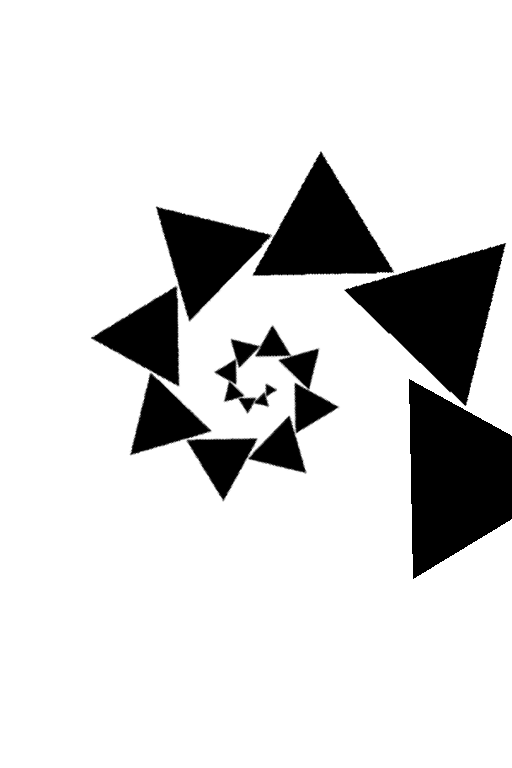

In [9]:
import path
path.setPathLocalNotebook()

from diffuserslib import GeometryPipeline, DrawRegularShape, Symmetrize, Spiralize, RandomPositionArgument, RandomNumberArgument, RandomStringArgument
from PIL import Image, ImageDraw
from IPython.display import display

geometry = GeometryPipeline(size=(512, 768))
geometry.addTask(DrawRegularShape(
    position=RandomPositionArgument(), 
    size=RandomNumberArgument(32, 128),
    rotation=RandomNumberArgument(0, 90), 
    sides=RandomNumberArgument(3, 6)
))
geometry.addTask(Spiralize(
    rotation=720, steps = 16, zoom = 4
))
image = geometry()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import shapeGeometryPipeline
from PIL import Image
from IPython.display import display


geom = shapeGeometryPipeline(shapes=2, maxsize = 128)
image = geom()
display(image)

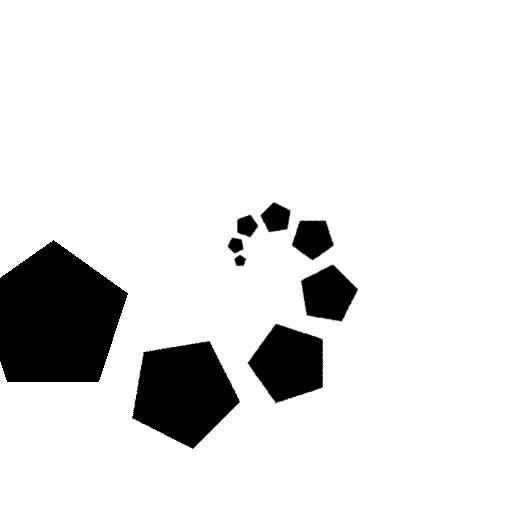

In [44]:
import path
path.setPathLocalNotebook()

from diffuserslib import spiralGeometryPipeline
from PIL import Image
from IPython.display import display


geom = spiralGeometryPipeline(shapes=1, maxsize = 96)
image = geom()
display(image)